# Question-4

Student Attendance Dashboard for Decision Making. You will be given a Google Sheet with different sheets holding data of different classes. Create a dashboard showing a summary of what's happening across different classes. Which students need attention for missing sessions? Which students are unsatisfied? Which students are very satisfied? Column shows attendance. R- Column shows the rating by the candidate. Extra marks for identifying more useful insights. Missing values of the Type column can be treated as STUDENT. This data gets updated on a daily basis. The latest data gets injected in early columns. Your code shouldn't need any changes to deal with the latest data. Please note: Visualisation is mandatory. You will receive 0 marks if you do not add visualisation.

Data Link: https://docs.google.com/spreadsheets/d/1Y_g6LQI2GLqpKf-fj-rH7D9gfnP2MJzpFA6t0AsBMi8/edit?usp=sharing

# Import the Standard Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [2]:
class_1 = pd.read_csv("Class1_data.csv")
class_2 = pd.read_csv("Class2_data.csv")

In [3]:
class_1.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,...,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,02-01-21,R-02-01-21,01-01-21,R-01-01-21
0,1,WORKING,Missed,6,Missed,10,Missed,5,Missed,6,...,Missed,6,Missed,8,Missed,9,Missed,10,Missed,10
1,2,NaN,Missed,10,Missed,10,Missed,6,Attended,9,...,Attended,8,Attended,6,Missed,7,Attended,10,Missed,8
2,3,STUDENT,Missed,10,Missed,8,Missed,9,Missed,9,...,Attended,9,Missed,7,Missed,7,Attended,5,Attended,6
3,4,STUDENT,Missed,10,Missed,8,Attended,10,Missed,6,...,Missed,6,Attended,9,Attended,8,Attended,8,Attended,7
4,5,WORKING,Missed,10,Missed,6,Missed,8,Missed,9,...,Missed,7,Missed,10,Missed,5,Missed,8,Missed,10


In [4]:
class_2.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,06-01-21,R-6-01-21,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,01-01-21,R-01-01-21
0,1,NaN,Attended,10,Attended,10,Attended,7,Attended,9,Attended,8,Attended,10,Attended,9,Missed,5,NaN,NaN
1,2,NaN,Attended,8,Attended,7,Attended,9,Attended,10,Attended,5,Attended,8,Attended,9,Attended,5,NaN,NaN
2,3,STUDENT,Missed,9,Missed,10,Missed,5,Missed,8,Missed,7,Missed,10,Missed,7,Missed,7,NaN,NaN
3,4,NaN,Attended,10,Attended,9,Attended,6,Attended,5,Missed,7,Missed,9,Attended,10,Attended,5,NaN,NaN
4,5,WORKING,Attended,5,Attended,8,Attended,9,Missed,9,Missed,10,Missed,9,Missed,7,Missed,5,NaN,NaN


In [5]:
print(class_1.shape)

(57, 22)


In [6]:
print(class_2.shape)

(70, 20)


# Dealing with Class_1 data

In [7]:
class_1.columns

Index(['Student Roll Num', 'Type', '10-01-21', 'R-10-01-21', '09-01-21',
       'R-9-01-21', '08-01-21', 'R-8-01-21', '07-01-21', 'R-7-01-21',
       '06-01-21', 'R-6-01-21', '05-01-21', 'R-5-01-21', '04-01-21',
       'R-4-01-21', '03-01-21', 'R-3-01-21', '02-01-21', 'R-02-01-21',
       '01-01-21', 'R-01-01-21'],
      dtype='object')

In [8]:
class_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Student Roll Num  57 non-null     int64 
 1   Type              32 non-null     object
 2   10-01-21          57 non-null     object
 3   R-10-01-21        57 non-null     int64 
 4   09-01-21          57 non-null     object
 5   R-9-01-21         57 non-null     int64 
 6   08-01-21          57 non-null     object
 7   R-8-01-21         57 non-null     int64 
 8   07-01-21          56 non-null     object
 9   R-7-01-21         57 non-null     int64 
 10  06-01-21          56 non-null     object
 11  R-6-01-21         57 non-null     int64 
 12  05-01-21          56 non-null     object
 13  R-5-01-21         57 non-null     int64 
 14  04-01-21          56 non-null     object
 15  R-4-01-21         57 non-null     int64 
 16  03-01-21          56 non-null     object
 17  R-3-01-21         

In [9]:
class_1.describe()

,Student Roll Num,R-10-01-21,R-9-01-21,R-8-01-21,R-7-01-21,R-6-01-21,R-5-01-21,R-4-01-21,R-3-01-21,R-02-01-21,R-01-01-21
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,29.000000,7.491228,7.385965,7.807018,7.543860,7.614035,7.631579,7.087719,7.473684,7.719298,7.578947
std,16.598193,1.637974,1.719161,1.694936,1.909283,1.698259,1.675790,1.755407,1.548101,1.829855,1.636060
min,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,15.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
50%,29.000000,7.000000,7.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000,8.000000,8.000000
75%,43.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,57.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
class_1.isnull().sum().sort_values(ascending=False).head(10)

Type         25
06-01-21      1
02-01-21      1
03-01-21      1
04-01-21      1
05-01-21      1
01-01-21      1
07-01-21      1
R-8-01-21     0
10-01-21      0
dtype: int64

# Handling null values

In [11]:
class_1["01-01-21"].fillna(class_1["01-01-21"].mode()[0], inplace=True)

In [12]:
class_1["02-01-21"].fillna(class_1["02-01-21"].mode()[0], inplace=True)

In [13]:
class_1["03-01-21"].fillna(class_1["03-01-21"].mode()[0], inplace=True)

In [14]:
class_1["04-01-21"].fillna(class_1["04-01-21"].mode()[0], inplace=True)

In [15]:
class_1["05-01-21"].fillna(class_1["05-01-21"].mode()[0], inplace=True)

In [16]:
class_1["06-01-21"].fillna(class_1["06-01-21"].mode()[0], inplace=True)

In [17]:
class_1["07-01-21"].fillna(class_1["07-01-21"].mode()[0], inplace=True)

In [18]:
class_1['Type'].fillna(class_1['Type'].mode()[0], inplace=True)

In [19]:
class_1.isnull().sum().sort_values(ascending=False).head(10)

R-01-01-21    0
01-01-21      0
Type          0
10-01-21      0
R-10-01-21    0
09-01-21      0
R-9-01-21     0
08-01-21      0
R-8-01-21     0
07-01-21      0
dtype: int64

In [20]:
class_1.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,...,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,02-01-21,R-02-01-21,01-01-21,R-01-01-21
0,1,WORKING,Missed,6,Missed,10,Missed,5,Missed,6,...,Missed,6,Missed,8,Missed,9,Missed,10,Missed,10
1,2,STUDENT,Missed,10,Missed,10,Missed,6,Attended,9,...,Attended,8,Attended,6,Missed,7,Attended,10,Missed,8
2,3,STUDENT,Missed,10,Missed,8,Missed,9,Missed,9,...,Attended,9,Missed,7,Missed,7,Attended,5,Attended,6
3,4,STUDENT,Missed,10,Missed,8,Attended,10,Missed,6,...,Missed,6,Attended,9,Attended,8,Attended,8,Attended,7
4,5,WORKING,Missed,10,Missed,6,Missed,8,Missed,9,...,Missed,7,Missed,10,Missed,5,Missed,8,Missed,10


# Dealing with Class_1 data

In [21]:
class_2.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,06-01-21,R-6-01-21,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,01-01-21,R-01-01-21
0,1,NaN,Attended,10,Attended,10,Attended,7,Attended,9,Attended,8,Attended,10,Attended,9,Missed,5,NaN,NaN
1,2,NaN,Attended,8,Attended,7,Attended,9,Attended,10,Attended,5,Attended,8,Attended,9,Attended,5,NaN,NaN
2,3,STUDENT,Missed,9,Missed,10,Missed,5,Missed,8,Missed,7,Missed,10,Missed,7,Missed,7,NaN,NaN
3,4,NaN,Attended,10,Attended,9,Attended,6,Attended,5,Missed,7,Missed,9,Attended,10,Attended,5,NaN,NaN
4,5,WORKING,Attended,5,Attended,8,Attended,9,Missed,9,Missed,10,Missed,9,Missed,7,Missed,5,NaN,NaN


In [22]:
class_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student Roll Num  70 non-null     int64  
 1   Type              30 non-null     object 
 2   10-01-21          70 non-null     object 
 3   R-10-01-21        70 non-null     int64  
 4   09-01-21          70 non-null     object 
 5   R-9-01-21         70 non-null     int64  
 6   08-01-21          70 non-null     object 
 7   R-8-01-21         70 non-null     int64  
 8   07-01-21          69 non-null     object 
 9   R-7-01-21         70 non-null     int64  
 10  06-01-21          69 non-null     object 
 11  R-6-01-21         70 non-null     int64  
 12  05-01-21          69 non-null     object 
 13  R-5-01-21         70 non-null     int64  
 14  04-01-21          69 non-null     object 
 15  R-4-01-21         70 non-null     int64  
 16  03-01-21          67 non-null     object 
 17 

In [23]:
class_2.describe()

,Student Roll Num,R-10-01-21,R-9-01-21,R-8-01-21,R-7-01-21,R-6-01-21,R-5-01-21,R-4-01-21,R-3-01-21,01-01-21,R-01-01-21
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,0.0,0.0
mean,35.500000,7.614286,7.728571,7.571429,6.971429,7.571429,8.085714,7.642857,7.685714,NaN,NaN
std,20.351085,1.599754,1.676102,1.724264,1.801541,1.584082,1.791630,1.826025,1.869223,NaN,NaN
min,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,NaN
25%,18.250000,6.250000,7.000000,6.000000,5.000000,6.000000,6.250000,6.000000,6.000000,NaN,NaN
50%,35.500000,8.000000,8.000000,8.000000,7.000000,7.000000,8.000000,8.000000,8.000000,NaN,NaN
75%,52.750000,8.750000,9.000000,9.000000,8.000000,9.000000,10.000000,9.000000,10.000000,NaN,NaN
max,70.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN


In [24]:
class_2.isnull().sum().sort_values(ascending=False).head(10)

R-01-01-21    70
01-01-21      70
Type          40
03-01-21       3
04-01-21       1
05-01-21       1
06-01-21       1
07-01-21       1
08-01-21       0
10-01-21       0
dtype: int64

# Handling Null Values

In [25]:
class_2['03-01-21'].fillna(class_2['03-01-21'].mode()[0], inplace=True)

In [26]:
class_2['04-01-21'].fillna(class_2['04-01-21'].mode()[0], inplace=True)

In [27]:
class_2['05-01-21'].fillna(class_2['05-01-21'].mode()[0], inplace=True)

In [28]:
class_2['06-01-21'].fillna(class_2['06-01-21'].mode()[0], inplace=True)

In [29]:
class_2['07-01-21'].fillna(class_2['07-01-21'].mode()[0], inplace=True)

In [30]:
class_2['Type'].fillna(class_2['Type'].mode()[0], inplace=True)

In [31]:
class_2.isnull().sum().sort_values(ascending=False).head(10)

R-01-01-21    70
01-01-21      70
Type           0
10-01-21       0
R-10-01-21     0
09-01-21       0
R-9-01-21      0
08-01-21       0
R-8-01-21      0
07-01-21       0
dtype: int64

# Merge the files

In [32]:
class_1.columns

Index(['Student Roll Num', 'Type', '10-01-21', 'R-10-01-21', '09-01-21',
       'R-9-01-21', '08-01-21', 'R-8-01-21', '07-01-21', 'R-7-01-21',
       '06-01-21', 'R-6-01-21', '05-01-21', 'R-5-01-21', '04-01-21',
       'R-4-01-21', '03-01-21', 'R-3-01-21', '02-01-21', 'R-02-01-21',
       '01-01-21', 'R-01-01-21'],
      dtype='object')

In [33]:
df = pd.concat([class_1, class_2])

In [34]:
df.columns

Index(['Student Roll Num', 'Type', '10-01-21', 'R-10-01-21', '09-01-21',
       'R-9-01-21', '08-01-21', 'R-8-01-21', '07-01-21', 'R-7-01-21',
       '06-01-21', 'R-6-01-21', '05-01-21', 'R-5-01-21', '04-01-21',
       'R-4-01-21', '03-01-21', 'R-3-01-21', '02-01-21', 'R-02-01-21',
       '01-01-21', 'R-01-01-21'],
      dtype='object')

In [35]:
df.shape

(127, 22)

In [36]:
df.fillna(0,inplace=True)

In [37]:
df.isna().sum()

Student Roll Num    0
Type                0
10-01-21            0
R-10-01-21          0
09-01-21            0
R-9-01-21           0
08-01-21            0
R-8-01-21           0
07-01-21            0
R-7-01-21           0
06-01-21            0
R-6-01-21           0
05-01-21            0
R-5-01-21           0
04-01-21            0
R-4-01-21           0
03-01-21            0
R-3-01-21           0
02-01-21            0
R-02-01-21          0
01-01-21            0
R-01-01-21          0
dtype: int64

# Visualization

In [38]:
df['Attended_Count'] = df[df == 'Attended'].count(axis=1)
df['Missed_Count'] = df[df == 'Missed'].count(axis=1)

In [39]:
df['Total_Sessions'] = df[['Attended_Count', 'Missed_Count']].sum(axis=1)

In [40]:
df['Attended_Percentage'] = (df['Attended_Count'] / df['Total_Sessions']) * 100
df['Missed_Percentage'] = (df['Missed_Count'] / df['Total_Sessions']) * 100

In [41]:
df.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,...,R-3-01-21,02-01-21,R-02-01-21,01-01-21,R-01-01-21,Attended_Count,Missed_Count,Total_Sessions,Attended_Percentage,Missed_Percentage
0,1,WORKING,Missed,6,Missed,10,Missed,5,Missed,6,...,9,Missed,10.0,Missed,10.0,0,10,10,0.0,100.0
1,2,STUDENT,Missed,10,Missed,10,Missed,6,Attended,9,...,7,Attended,10.0,Missed,8.0,4,6,10,40.0,60.0
2,3,STUDENT,Missed,10,Missed,8,Missed,9,Missed,9,...,7,Attended,5.0,Attended,6.0,4,6,10,40.0,60.0
3,4,STUDENT,Missed,10,Missed,8,Attended,10,Missed,6,...,8,Attended,8.0,Attended,7.0,5,5,10,50.0,50.0
4,5,WORKING,Missed,10,Missed,6,Missed,8,Missed,9,...,5,Missed,8.0,Missed,10.0,0,10,10,0.0,100.0


In [42]:
student_data = df[df['Type'] == 'STUDENT']
working_data = df[df['Type'] == 'WORKING']
ignore_data = df[df['Type'] == 'IGNORE']
dropout_data = df[df['Type'] == 'DROPOUT']

In [43]:
types = ['Student', 'Working', 'IGNORE', 'Dropout']
attended_percentage = [
    student_data['Attended_Percentage'].mean(),
    working_data['Attended_Percentage'].mean(),
    ignore_data['Attended_Percentage'].mean(),
    dropout_data['Attended_Percentage'].mean()
]

In [44]:
missed_percentage = [
    student_data['Missed_Percentage'].mean(),
    working_data['Missed_Percentage'].mean(),
    ignore_data['Missed_Percentage'].mean(),
    dropout_data['Missed_Percentage'].mean()
]

In [45]:
bar_width = 0.3
r1 = range(len(types))
r2 = [x + bar_width for x in r1]

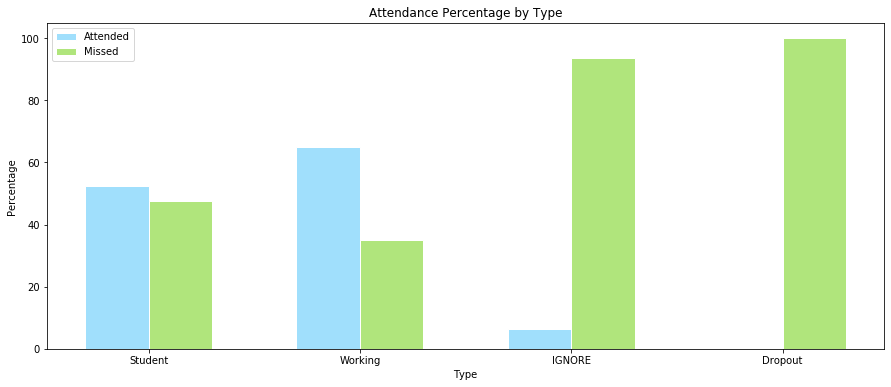

In [46]:
plt.figure(figsize=(15, 6))
plt.bar(r1, attended_percentage, color='#A0DFFC', width=bar_width, edgecolor='white', label='Attended')
plt.bar(r2, missed_percentage, color='#B0E57C', width=bar_width, edgecolor='white', label='Missed')
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.title('Attendance Percentage by Type')
plt.xticks([r + bar_width/2 for r in range(len(types))], types)
plt.legend()
plt.show()

1.Students are almost equally attending and missing the classes need more focus on students.

2.From above polt we can observe that Ignore, Dropout, Students are missing the sessions.

In [47]:
student_ratings = df[df['Type'] == 'STUDENT'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
working_ratings = df[df['Type'] == 'WORKING'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
ignore_ratings = df[df['Type'] == 'IGNORE'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
dropout_ratings = df[df['Type'] == 'DROPOUT'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]

In [48]:
student_ratings = student_ratings.values.flatten()
working_ratings = working_ratings.values.flatten()
ignore_ratings = ignore_ratings.values.flatten()
dropout_ratings = dropout_ratings.values.flatten()

In [49]:
ratings = np.concatenate([student_ratings, working_ratings, ignore_ratings, dropout_ratings])
types = ['STUDENT'] * len(student_ratings) + ['WORKING'] * len(working_ratings) + ['IGNORE'] * len(ignore_ratings) + ['DROPOUT'] * len(dropout_ratings)
df_ratings = pd.DataFrame({'Rating': ratings, 'Type': types})


filtered_ratings = df_ratings[(df_ratings['Rating'] >= 5) & (df_ratings['Rating'] <= 7)]

In [50]:
rating_counts = filtered_ratings.groupby(['Type', 'Rating']).size().reset_index(name='Count')

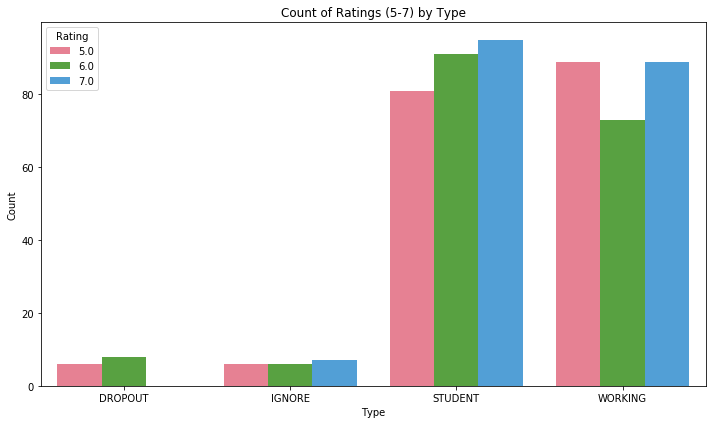

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Count', hue='Rating', data=rating_counts, palette='husl')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Ratings (5-7) by Type')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

1.Highly unsatisfied people are working people.

2.Above image shows that very Low rating(5) was given by working people.

3.Above plot shows the 5-7 range ratings given by type of people.

In [52]:
ratings = np.concatenate([student_ratings, working_ratings, ignore_ratings, dropout_ratings])
types = ['STUDENT'] * len(student_ratings) + ['WORKING'] * len(working_ratings) + ['IGNORE'] * len(ignore_ratings) + ['DROPOUT'] * len(dropout_ratings)
df_ratings = pd.DataFrame({'Rating': ratings, 'Type': types})

In [53]:
filtered_ratings = df_ratings[(df_ratings['Rating'] >= 8) & (df_ratings['Rating'] <= 10)]
rating_counts = filtered_ratings.groupby(['Type', 'Rating']).size().reset_index(name='Count')

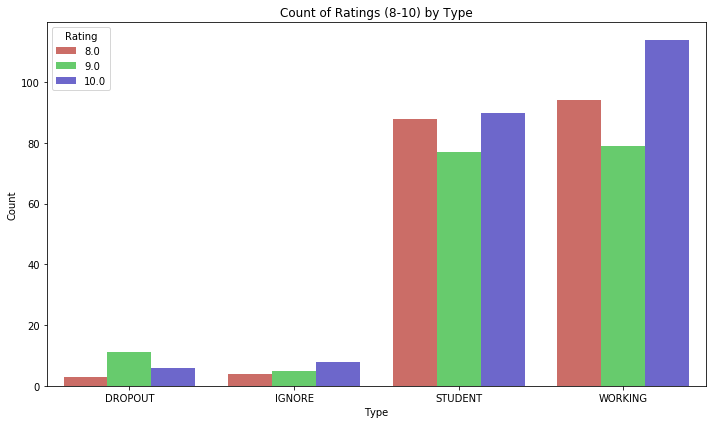

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Count', hue='Rating', data=rating_counts, palette='hls')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Ratings (8-10) by Type')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

1.Highly Satisfied people are Students.

2.Above plot image shows the ratings range 8-10.

3.Highest rating 10 was highly given by students followed by working people.

# Visualizing Class 1 and Class 2

In [55]:
student_ratings = class_1[class_1['Type'] == 'STUDENT'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
working_ratings = class_1[class_1['Type'] == 'WORKING'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
ignore_ratings = class_1[class_1['Type'] == 'IGNORE'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
dropout_ratings = class_1[class_1['Type'] == 'DROPOUT'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]

In [56]:
student_ratings = student_ratings.values.flatten()
working_ratings = working_ratings.values.flatten()
ignore_ratings = ignore_ratings.values.flatten()
dropout_ratings = dropout_ratings.values.flatten()

In [57]:
ratings = np.concatenate([student_ratings, working_ratings, ignore_ratings, dropout_ratings])
types = ['STUDENT'] * len(student_ratings) + ['WORKING'] * len(working_ratings) + ['IGNORE'] * len(ignore_ratings) + ['DROPOUT'] * len(dropout_ratings)
df_ratings = pd.DataFrame({'Rating': ratings, 'Type': types})

In [58]:
filtered_ratings = df_ratings[(df_ratings['Rating'] >= 5) & (df_ratings['Rating'] <= 10)]

In [59]:
rating_counts = filtered_ratings.groupby(['Type', 'Rating']).size().reset_index(name='Count')

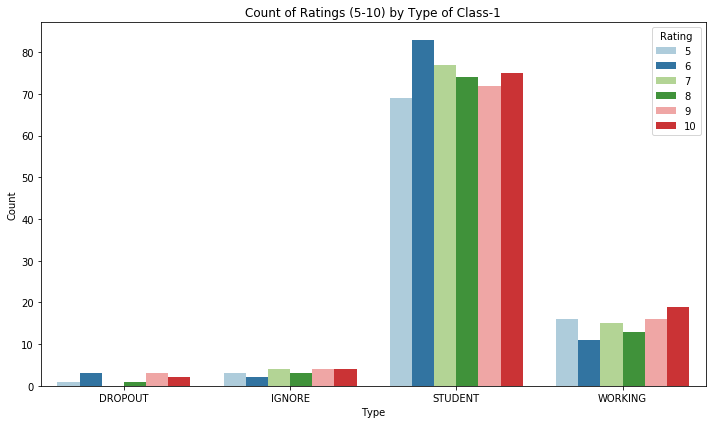

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Count', hue='Rating', data=rating_counts, palette='Paired')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Ratings (5-10) by Type of Class-1')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

1.In class-1 Highest satisfied people are Students and they have given highest 10 rating.

2.Also Lowest 5 ratings are highly given by students only followed by working people.

In [61]:
student_ratings = class_1[class_1['Type'] == 'STUDENT'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
working_ratings = class_1[class_1['Type'] == 'WORKING'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
ignore_ratings = class_1[class_1['Type'] == 'IGNORE'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
dropout_ratings = class_1[class_1['Type'] == 'DROPOUT'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]

In [62]:
student_ratings = student_ratings.values.flatten()
working_ratings = working_ratings.values.flatten()
ignore_ratings = ignore_ratings.values.flatten()
dropout_ratings = dropout_ratings.values.flatten()

In [63]:
ratings = np.concatenate([student_ratings, working_ratings, ignore_ratings, dropout_ratings])
types = ['STUDENT'] * len(student_ratings) + ['WORKING'] * len(working_ratings) + ['IGNORE'] * len(ignore_ratings) + ['DROPOUT'] * len(dropout_ratings)
df_ratings = pd.DataFrame({'Rating': ratings, 'Type': types})

In [64]:
filtered_ratings = df_ratings[(df_ratings['Rating'] >= 5) & (df_ratings['Rating'] <= 10)]

In [65]:
rating_counts = filtered_ratings.groupby(['Type', 'Rating']).size().reset_index(name='Count')

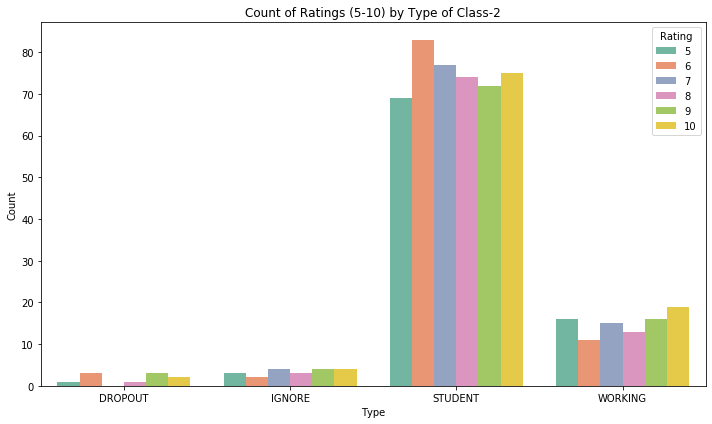

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Count', hue='Rating', data=rating_counts, palette='Set2')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Ratings (5-10) by Type of Class-2')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

Note:
    
1.In both classes we have seen mixed ratings.

2.In class-1 highest people are students and in class-2 highest people are working.

In [67]:
class_1['Attended_Count'] = class_1[class_1 == 'Attended'].count(axis=1)
class_1['Missed_Count'] = class_1[class_1 == 'Missed'].count(axis=1)
class_1['Total_Sessions'] = class_1[['Attended_Count', 'Missed_Count']].sum(axis=1)

In [68]:
class_1['Attended_Percentage'] = (class_1['Attended_Count'] / class_1['Total_Sessions']) * 100
class_1['Missed_Percentage'] = (class_1['Missed_Count'] / class_1['Total_Sessions']) * 100

In [69]:
student_data = class_1[class_1['Type'] == 'STUDENT']
working_data = class_1[class_1['Type'] == 'WORKING']
ignore_data = class_1[class_1['Type'] == 'IGNORE']
dropout_data = class_1[class_1['Type'] == 'DROPOUT']

In [70]:
types = ['Student', 'Working', 'IGNORE', 'Dropout']
attended_percentage = [
    student_data['Attended_Percentage'].mean(),
    working_data['Attended_Percentage'].mean(),
    ignore_data['Attended_Percentage'].mean(),
    dropout_data['Attended_Percentage'].mean()
]

missed_percentage = [
    student_data['Missed_Percentage'].mean(),
    working_data['Missed_Percentage'].mean(),
    ignore_data['Missed_Percentage'].mean(),
    dropout_data['Missed_Percentage'].mean()
]

In [71]:
bar_width = 0.35
r1 = range(len(types))
r2 = [x + bar_width for x in r1]

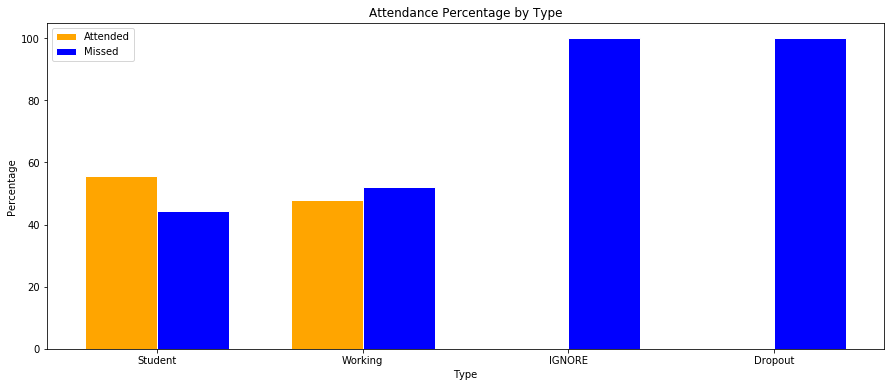

In [72]:
plt.figure(figsize=(15, 6))
plt.bar(r1, attended_percentage, color='#FFA500', width=bar_width, edgecolor='white', label='Attended')
plt.bar(r2, missed_percentage, color='#0000FF', width=bar_width, edgecolor='white', label='Missed')
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.title('Attendance Percentage by Type')
plt.xticks([r + bar_width/2 for r in range(len(types))], types)
plt.legend()
plt.show()

In [73]:
class_2['Attended_Count'] = class_2[class_2 == 'Attended'].count(axis=1)
class_2['Missed_Count'] = class_2[class_2 == 'Missed'].count(axis=1)
class_2['Total_Sessions'] = class_2[['Attended_Count', 'Missed_Count']].sum(axis=1)
class_2['Attended_Percentage'] = (class_2['Attended_Count'] / class_2['Total_Sessions']) * 100
class_2['Missed_Percentage'] = (class_2['Missed_Count'] / class_2['Total_Sessions']) * 100

In [74]:
student_data = class_2[class_2['Type'] == 'STUDENT']
working_data = class_2[class_2['Type'] == 'WORKING']
ignore_data = class_2[class_2['Type'] == 'IGNORE']
dropout_data = class_2[class_2['Type'] == 'DROPOUT']

In [75]:
types = ['Student', 'Working', 'IGNORE', 'Dropout']
attended_percentage = [
    student_data['Attended_Percentage'].mean(),
    working_data['Attended_Percentage'].mean(),
    ignore_data['Attended_Percentage'].mean(),
    dropout_data['Attended_Percentage'].mean()
]

missed_percentage = [
    student_data['Missed_Percentage'].mean(),
    working_data['Missed_Percentage'].mean(),
    ignore_data['Missed_Percentage'].mean(),
    dropout_data['Missed_Percentage'].mean()
]

In [76]:
bar_width = 0.3
r1 = range(len(types))
r2 = [x + bar_width for x in r1]

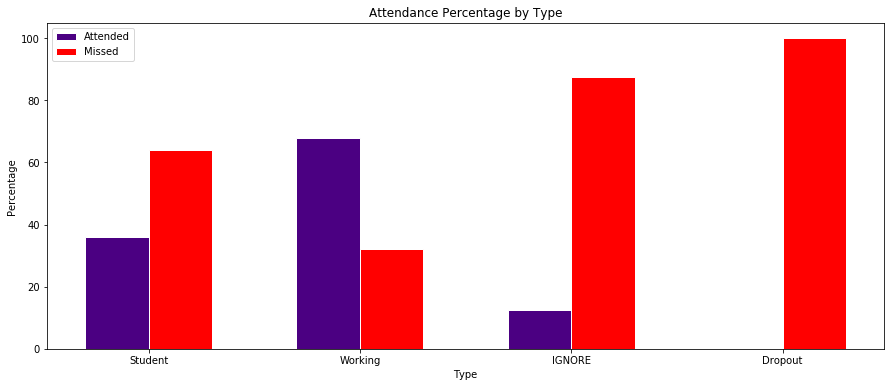

In [77]:
plt.figure(figsize=(15, 6))
plt.bar(r1, attended_percentage, color='#4B0082', width=bar_width, edgecolor='white', label='Attended')
plt.bar(r2, missed_percentage, color='#FF0000', width=bar_width, edgecolor='white', label='Missed')
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.title('Attendance Percentage by Type')
plt.xticks([r + bar_width/2 for r in range(len(types))], types)
plt.legend()
plt.show()

Observation:

1.It's been observed that in both classes dropouts and ignoring people are high.

2.Students and working people in both classes are ignoring major classes.

3.Need to focus on students and working people to increase high attendence